In [2]:
# Imports
import os

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2

README

# Drive on Mars

![Mars rover](https://panoptes-uploads.zooniverse.org/production/project_attached_image/17243d9d-1258-4aa7-80f0-6e7b20e957c6.png)

With this project we are attempting to improve the future of self driving vehicles on Mars.
Current autonomous vehicles driving algorithms are trained for streets and roads, very different from the conditions on Mars. 

Our model will predict which kind of terrains lies ahead of a rover: from soil, sand, bedrock or big rocks. This informs a rover navigation on the best route to take. We will build an image segmentation classifier, with a trained model available online.



# To work on this project:

## Clone this repo
`git clone  git@github.com:TigerManon/drive-on-mars.git`

## Download the data from Kaggle

[AI4MARS dataset](https://www.kaggle.com/datasets/yash92328/ai4mars-terrainaware-autonomous-driving-on-mars/data)


```
mv archive.zip <your-path-to-the-repo>/drive-on-mars/raw_data
cd <your-path-to-the-repo>/drive-on-mars/raw_data
unzip archive.zip
rm archive.zip


pip install -r requirements
```

# For our team

Use the following commands

`path-to-the-repo =  ~/code/TigerManon`

```
mv archive.zip ~/code/TigerManon/drive-on-mars/raw_data
cd ~/code/TigerManon/drive-on-mars/raw_data
unzip archive.zip
rm archive.zip

pip install -r requirements
```


## Defining paths

In [3]:
# Customize your path here
root_path = '../'

In [4]:
DATA_PATH = os.path.join(root_path, 'raw_data', 'ai4mars-dataset-merged-0.1', 'msl')
DATA_PATH

'../raw_data/ai4mars-dataset-merged-0.1/msl'

In [5]:
IMAGE_PATH = os.path.join(DATA_PATH, 'images', 'edr')
MASK_PATH_TRAIN = os.path.join(DATA_PATH, 'labels', 'train')
MASK_PATH_TESTS = os.path.join(DATA_PATH, 'labels', 'test')
TESTS_DIR = ['masked-gold-min1-100agree', 'masked-gold-min2-100agree', 'masked-gold-min3-100agree']

MASK_ROVER = os.path.join(DATA_PATH, 'images', 'mxy')
RANGE_30M = os.path.join(DATA_PATH, 'images', 'rng-30m')

In [6]:
def list_data_files():
    images = os.listdir(IMAGE_PATH)
    print(f"Found {len(images)} files in {IMAGE_PATH}")

    rover_masks = os.listdir(MASK_ROVER)
    print(f"Found {len(rover_masks)} files in {MASK_ROVER}")

    range_masks = os.listdir(RANGE_30M)
    print(f"Found {len(range_masks)} files in {RANGE_30M}")

    train_masks = os.listdir(MASK_PATH_TRAIN)
    print(f"Found {len(train_masks)} files in {MASK_PATH_TRAIN}")

    print('-'*20)
    for test_dir in TESTS_DIR:
        test_dir_path = os.path.join(MASK_PATH_TESTS,test_dir)
        print(f"Found {len(os.listdir(test_dir_path))} files in {test_dir_path}")

list_data_files()

Found 36260 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/edr
Found 36194 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/mxy
Found 36192 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/images/rng-30m
Found 32128 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/train
--------------------
Found 644 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min1-100agree
Found 644 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min2-100agree
Found 644 files in ../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min3-100agree


In [6]:
color_channels = 1

### Opening an image

In [10]:
images = sorted(os.listdir(IMAGE_PATH))

In [29]:
# Testing with first image
test = 11962
imname = images[test].split('.')[0]
imname

'NLB_463551084EDR_F0411534NCAM00385M1'

In [30]:
image_file = os.path.join(IMAGE_PATH,images[test])
image_file

'../raw_data/ai4mars-dataset-merged-0.1/msl/images/edr/NLB_463551084EDR_F0411534NCAM00385M1.JPG'

In [13]:
img_raw = cv2.imread(image_file)
img = np.zeros((1024,1024))
img[:,:] = img_raw[:,:,0]
img

TypeError: 'NoneType' object is not subscriptable

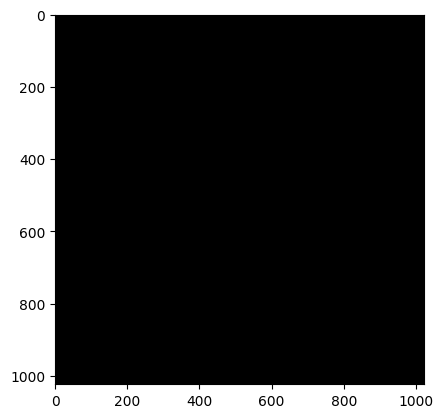

In [31]:
plt.imshow(img,cmap='gray')

### Opening rover and range masks

In [32]:
mask_file = os.path.join(MASK_ROVER, imname.replace("EDR","MXY") + ".png")
mask_file

'../raw_data/ai4mars-dataset-merged-0.1/msl/images/mxy/NLB_463551084MXY_F0411534NCAM00385M1.png'

In [33]:
mask_raw = np.array(cv2.imread(mask_file))
mask_raw
mask = np.zeros((1024,1024))
mask[:,:] = mask_raw[:,:,0]
mask = 1-mask

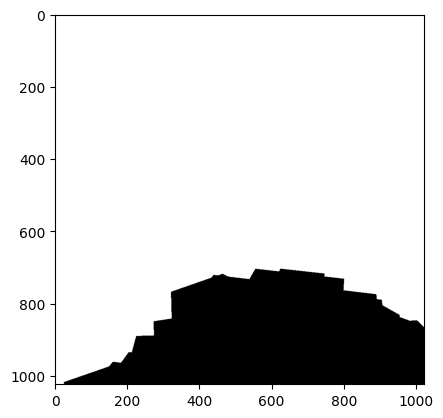

In [14]:
plt.imshow(mask,cmap='gray')
plt.title;

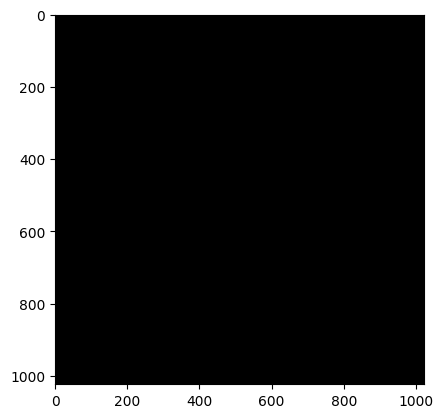

In [16]:
img_mask = img * mask
plt.imshow(img_mask,cmap='gray') ;

In [34]:
range_mask_file = os.path.join(RANGE_30M, imname.replace("EDR","RNG") + ".png")
range_mask_file


'../raw_data/ai4mars-dataset-merged-0.1/msl/images/rng-30m/NLB_463551084RNG_F0411534NCAM00385M1.png'

In [35]:
range_30m_raw = np.array(cv2.imread(range_mask_file))

range_30m = np.zeros((1024,1024))
range_30m[:,:] = range_30m_raw[:,:,0]
range_30m = 1 - range_30m
range_30m

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

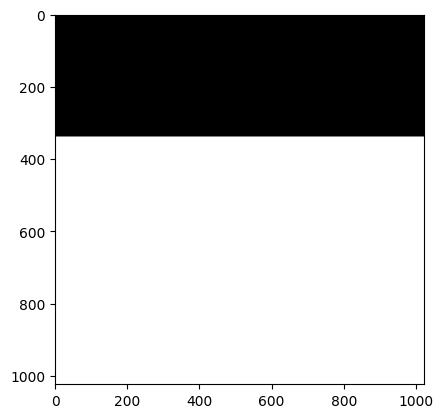

In [18]:
plt.imshow(range_30m,cmap='gray') ;

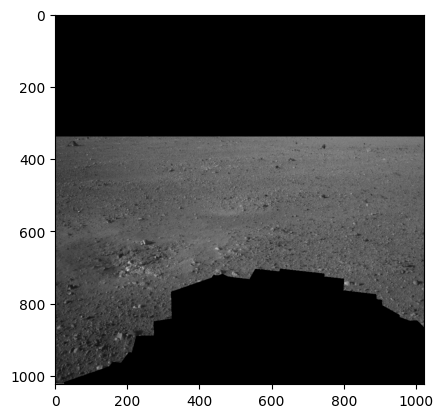

In [19]:
img_mask = img * mask * range_30m
plt.imshow(img_mask,cmap='gray') ;

## Load data methods

In [42]:
def create_df(path):
    """
    Loading images with corresponding masks and labels
    """
    names = []
    labels = []

    for filename in sorted(os.listdir(path)):
        imname = filename.split('.')[0]

        label = imname
        imname = imname.replace("_merged","")

        # checking raw image
        raw_image_file = os.path.join(IMAGE_PATH,imname + ".JPG")
        if not os.path.isfile(raw_image_file):
            print('No raw image found for', imname)
            continue

        # checking rover masks
        mask_rover_file = os.path.join(MASK_ROVER,imname.replace("EDR","MXY") + ".png")
        if not os.path.isfile(mask_rover_file):
            print('No rover mask found for', imname)
            continue

        # checking range masks
        range_mask_file = os.path.join(RANGE_30M, imname.replace("EDR","RNG") + ".png")
        if not os.path.isfile(range_mask_file):
            print('No range mask found for', imname)
            continue

        names.append(imname)
        labels.append(label)

    df = pd.DataFrame(
        {'name': names, 'label': labels},
        index = np.arange(0, len(names)))
    df['rov_mask'] = df.name.apply(lambda imname: imname.replace("EDR","MXY"))
    df['rang_mask'] = df.name.apply(lambda imname: imname.replace("EDR","RNG"))

    return df

In [43]:
df_train = create_df(MASK_PATH_TRAIN)
df_train

No range mask found for NLB_432655207EDR_F0160148NCAM00394M1
No range mask found for NLB_432655207EDR_F0160148NCAM00394M1


,name,label,rov_mask,rang_mask
0,NLA_397586934EDR_F0010008AUT_04096M1,NLA_397586934EDR_F0010008AUT_04096M1,NLA_397586934MXY_F0010008AUT_04096M1,NLA_397586934RNG_F0010008AUT_04096M1
1,NLA_397586934EDR_F0010008AUT_04096M1,NLA_397586934EDR_F0010008AUT_04096M1,NLA_397586934MXY_F0010008AUT_04096M1,NLA_397586934RNG_F0010008AUT_04096M1
2,NLA_397681339EDR_F0020000AUT_04096M1,NLA_397681339EDR_F0020000AUT_04096M1,NLA_397681339MXY_F0020000AUT_04096M1,NLA_397681339RNG_F0020000AUT_04096M1
3,NLA_397681339EDR_F0020000AUT_04096M1,NLA_397681339EDR_F0020000AUT_04096M1,NLA_397681339MXY_F0020000AUT_04096M1,NLA_397681339RNG_F0020000AUT_04096M1
4,NLA_397681372EDR_F0020000AUT_04096M1,NLA_397681372EDR_F0020000AUT_04096M1,NLA_397681372MXY_F0020000AUT_04096M1,NLA_397681372RNG_F0020000AUT_04096M1
...,...,...,...,...
32121,NRB_589344414EDR_F0722272NCAM00272M1,NRB_589344414EDR_F0722272NCAM00272M1,NRB_589344414MXY_F0722272NCAM00272M1,NRB_589344414RNG_F0722272NCAM00272M1
32122,NRB_605858122EDR_F0750000NCAM00288M1,NRB_605858122EDR_F0750000NCAM00288M1,NRB_605858122MXY_F0750000NCAM00288M1,NRB_605858122RNG_F0750000NCAM00288M1
32123,NRB_605858122EDR_F0750000NCAM00288M1,NRB_605858122EDR_F0750000NCAM00288M1,NRB_605858122MXY_F0750000NCAM00288M1,NRB_605858122RNG_F0750000NCAM00288M1
32124,NRB_606479584EDR_F0750456NCAM00294M1,NRB_606479584EDR_F0750456NCAM00294M1,NRB_606479584MXY_F0750456NCAM00294M1,NRB_606479584RNG_F0750456NCAM00294M1


In [44]:
MASK_PATH_TEST3 = os.path.join(MASK_PATH_TESTS, TESTS_DIR[0])
df_test = create_df(MASK_PATH_TEST3)
df_test

,name,label,rov_mask,rang_mask
0,NLA_409036068EDR_F0051606NCAM00348M1,NLA_409036068EDR_F0051606NCAM00348M1_merged,NLA_409036068MXY_F0051606NCAM00348M1,NLA_409036068RNG_F0051606NCAM00348M1
1,NLA_409036068EDR_F0051606NCAM00348M1,NLA_409036068EDR_F0051606NCAM00348M1_merged,NLA_409036068MXY_F0051606NCAM00348M1,NLA_409036068RNG_F0051606NCAM00348M1
2,NLA_409036116EDR_F0051606NCAM00348M1,NLA_409036116EDR_F0051606NCAM00348M1_merged,NLA_409036116MXY_F0051606NCAM00348M1,NLA_409036116RNG_F0051606NCAM00348M1
3,NLA_409036116EDR_F0051606NCAM00348M1,NLA_409036116EDR_F0051606NCAM00348M1_merged,NLA_409036116MXY_F0051606NCAM00348M1,NLA_409036116RNG_F0051606NCAM00348M1
4,NLA_409036860EDR_F0051662NCAM00346M1,NLA_409036860EDR_F0051662NCAM00346M1_merged,NLA_409036860MXY_F0051662NCAM00346M1,NLA_409036860RNG_F0051662NCAM00346M1
...,...,...,...,...
639,NLB_613583877EDR_F0760568NCAM00354M1,NLB_613583877EDR_F0760568NCAM00354M1_merged,NLB_613583877MXY_F0760568NCAM00354M1,NLB_613583877RNG_F0760568NCAM00354M1
640,NLB_613584057EDR_F0760568NCAM00281M1,NLB_613584057EDR_F0760568NCAM00281M1_merged,NLB_613584057MXY_F0760568NCAM00281M1,NLB_613584057RNG_F0760568NCAM00281M1
641,NLB_613584057EDR_F0760568NCAM00281M1,NLB_613584057EDR_F0760568NCAM00281M1_merged,NLB_613584057MXY_F0760568NCAM00281M1,NLB_613584057RNG_F0760568NCAM00281M1
642,NLB_613584326EDR_F0760568NCAM00281M1,NLB_613584326EDR_F0760568NCAM00281M1_merged,NLB_613584326MXY_F0760568NCAM00281M1,NLB_613584326RNG_F0760568NCAM00281M1


In [548]:
labels_key = {
    0: 'soil',
    1: 'bedrock',
    2: 'sand',
    3: 'big rock',
    4: '(no label)',
}

custom_colors = {
    0: 'blue',
    1: 'yellow',
    2: 'purple',
    3: 'red',
    4: 'white',
}

cmap_labels = ListedColormap([custom_colors[i] for i in range(max(custom_colors)+1)])

In [46]:
def load_image_set(im_id, df):

    # Load raw image
    edr_file = f'{df.name.iloc[im_id]}.JPG'
    image_raw = cv2.imread(os.path.join(IMAGE_PATH,edr_file))
    image = image_raw[:,:,0]

    # Load labels
    label_file = f'{df.label.iloc[im_id]}.png'
    label_raw = cv2.imread(os.path.join(MASK_PATH_TRAIN,label_file))
    label = label_raw[:,:,0]

    # Changing scale for the 'No label' encoded as 255
    label[label == 255] = 4

    # Load and combine both masks
    rov_mask_file = f'{df.rov_mask.iloc[im_id]}.png'
    rov_mask_raw = np.array(cv2.imread(os.path.join(MASK_ROVER,rov_mask_file)))
    rov_mask = np.zeros((1024,1024))
    rov_mask[:,:] = rov_mask_raw[:,:,0]

    rang_mask_file = f'{df.rang_mask.iloc[im_id]}.png'
    rang_mask_raw = np.array(cv2.imread(os.path.join(RANGE_30M,rang_mask_file)))
    rang_mask = np.zeros((1024,1024))
    rang_mask[:,:] = rang_mask_raw[:,:,0]

    # reversing mask to only keep the image out of the mask
    mask = (1-rov_mask) * (1-rang_mask)

    return image, label, mask

In [47]:
def decompose_label(label_img):

    label_0 = np.where(label_img == 0, 1, 0)
    label_1 = np.where(label_img == 1, 1, 0)
    label_2 = np.where(label_img == 2, 1, 0)
    label_3 = np.where(label_img == 3, 1, 0)
    label_4 = np.where(label_img == 4, 1, 0)

    return np.array([label_0, label_1, label_2, label_3, label_4])


In [1]:
def load_images(df):
    """
    Aggregates images and labels with masks applied
    Input: Dataframe of train or test sets
    Output: Array of
        masked images from raws
        masked labels
    """
    X, y = [], []
    for i in df.index:
        [image, label, mask] = load_image_set(i, df)

        X.append(image * mask)
        y.append(label * mask)

    X = np.array(X)
    y = np.array(y)
    print('✅ loaded raw images and labels')
    y_decomp = decompose_label(y)
    print('✅ decomposed labels into binary masks')

    return X, y_decomp

X,y = load_images(df_train.iloc[:100])

NameError: name 'df_train' is not defined

In [27]:
X.shape

(200, 1024, 1024)

In [41]:
def show_image(image, mask=None):

    n_sub = 1
    if mask is not None:
        n_sub=2
    fig, ax = plt.subplots(1, n_sub, figsize=(16,9))

    ax[0].axis('off')
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Raw image')

    if n_sub==2:
        ax[1].axis('off')
        ax[1].imshow(image*mask, cmap='gray')
        ax[1].set_title('Masked')


In [48]:
# Showing examples of images where there is a variety of terrains
for i in range(500):
    image, label, mask = load_image_set(i, df_train)
    if len(np.unique(label))>4:
        print(i)
        show_image(image, mask)


In [348]:
lab_test_np = cv2.imread(label_test)
lab_test_np

[ WARN:0@12326.765] global loadsave.cpp:248 findDecoder imread_('../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min1-100agree/NLB_615806500EDR_F0761714NCAM00354M1_merged.png'): can't open/read file: check file path/integrity


In [351]:
def load_image_test(img_test,label_test):
    # Load raw image
    image_raw = cv2.imread(img_test)
    image = image_raw[:,:,0]
    # Load labels
    label_raw = cv2.imread(label_test)
    label = label_raw[:,:,0]
    # Changing scale for the 'No label' encoded as 255
    label[label == 255] = 4
    return image, label

In [353]:
# Picking just one example to work on for the rest of the notebook
ex_id = 26220

image, label = load_image_test(img_test,label_test)

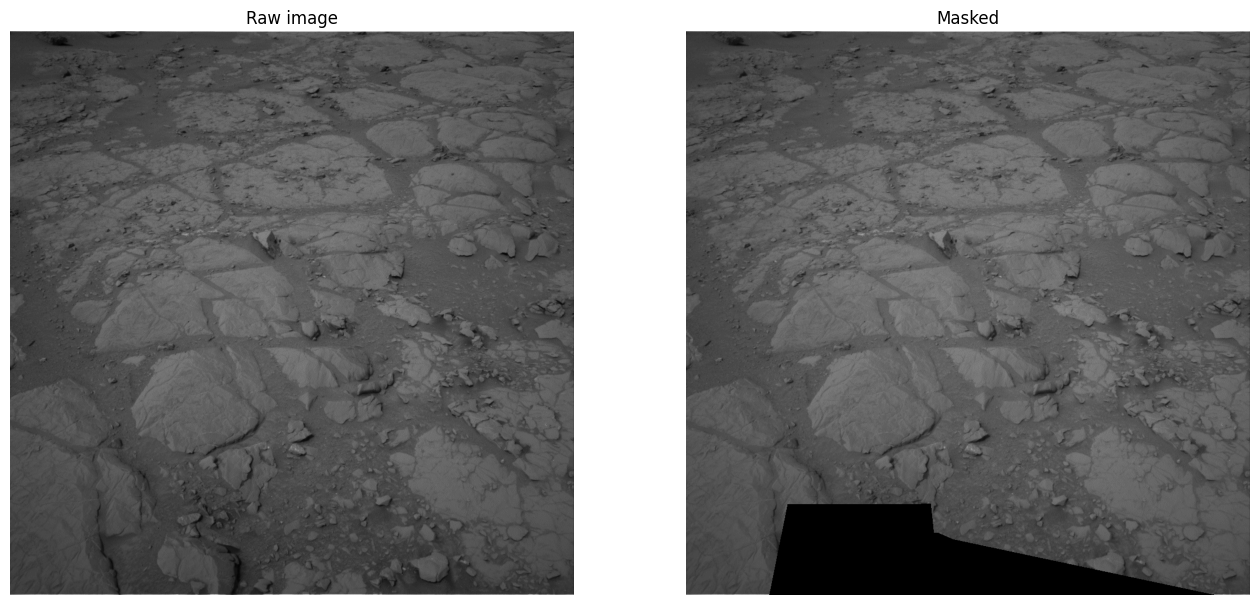

In [357]:
show_image(image, mask)

In [ ]:
decomp = decompose_label(label)
decomp.shape

In [439]:
try_image_path = 'NLB_579046369EDR_F0701430NCAM00354M1'

img_test = f'{IMAGE_PATH}/{try_image_path}.JPG'

label_test = f'{MASK_PATH_TRAIN}/{try_image_path}.png'

Image slides:
NLB_579046369EDR_F0701430NCAM00354M1
NLB_548858612EDR_F0631636NCAM00277M1

In [440]:
image, label = load_image_test(img_test,label_test)

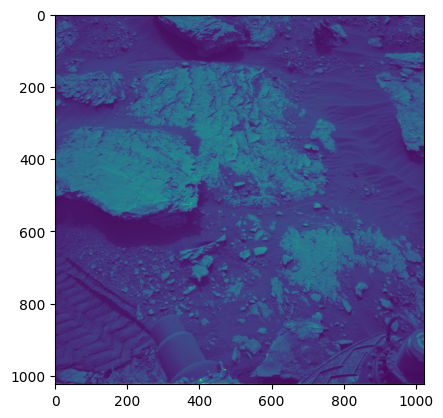

In [512]:
plt.imshow(image)

In [488]:
colors =['Blues', 'Greens', 'Oranges', 'Reds']

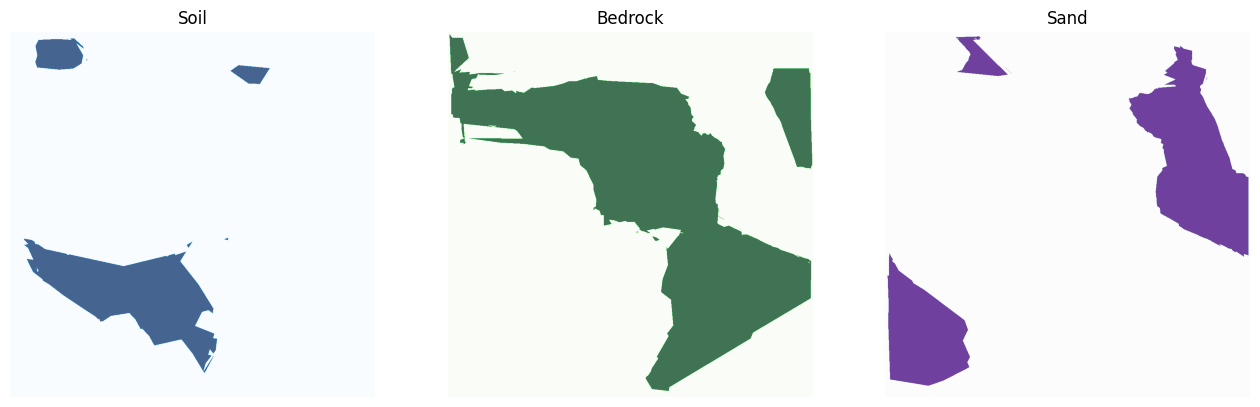

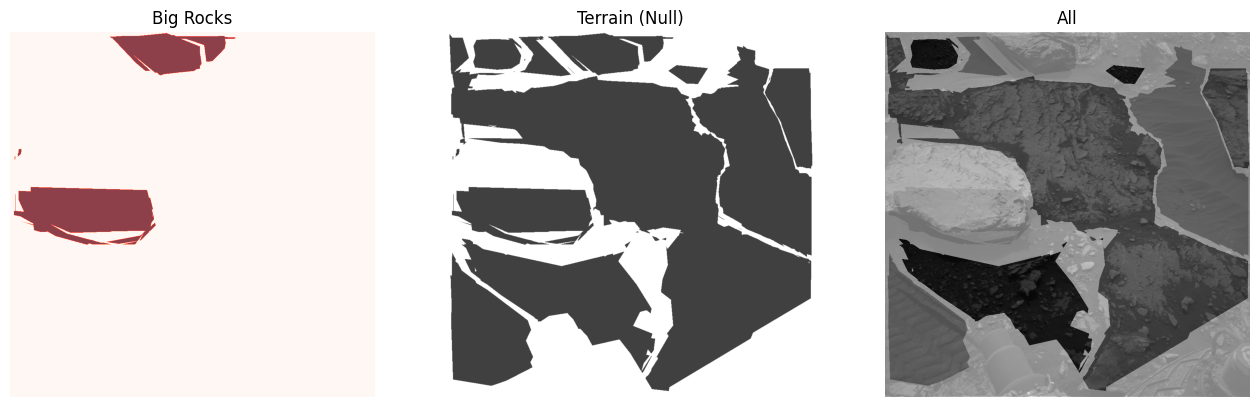

In [620]:
def show_labels_indv(label,image):

    label_0, label_1, label_2, label_3, label_4 = decompose_label(label)

    fig, ax = plt.subplots(1, 3, figsize=(16,9))
    ax[0].axis('off')
    ax[0].imshow(label_0, alpha =0.75, cmap='Blues')
    ax[0].set_title('Soil')
    ax[1].axis('off')
    ax[1].imshow(label_1, alpha =0.75, cmap='Greens')
    ax[1].set_title('Bedrock')
    ax[2].axis('off')
    ax[2].imshow(label_2, alpha =0.75, cmap='Purples')
    ax[2].set_title('Sand')

    fig, ax = plt.subplots(1, 3, figsize=(16,9))
    ax[0].axis('off')
    ax[0].imshow(label_3, alpha =0.75, cmap='Reds')
    ax[0].set_title('Big Rocks')
    ax[1].axis('off')
    ax[1].imshow(label_4, alpha =0.75,cmap='gray')
    ax[1].set_title('Terrain (Null)')

    ax[2].axis('off')
    ax[2].imshow(image,cmap='gray')
    ax[2].imshow(label, alpha =0.5, cmap='Greys_r')


    ax[2].set_title('All')

show_labels_indv(label,image)

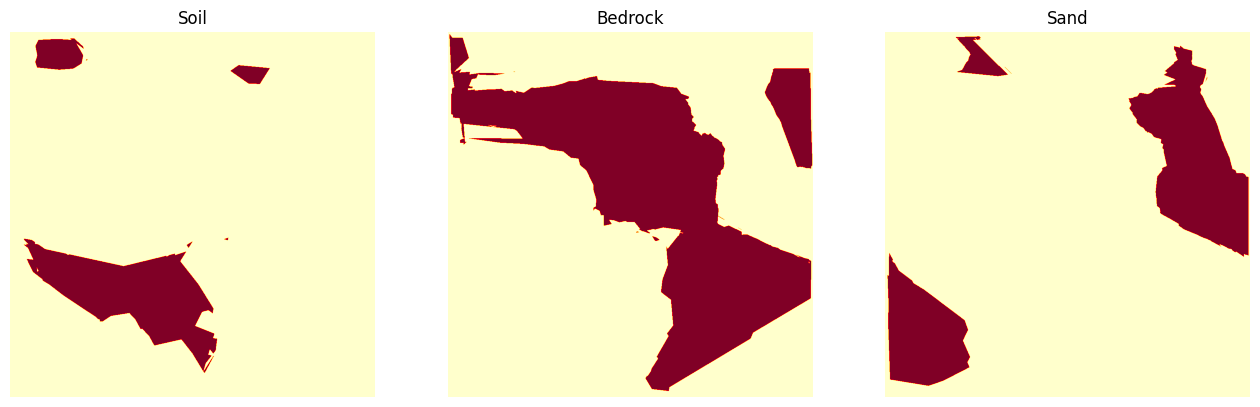

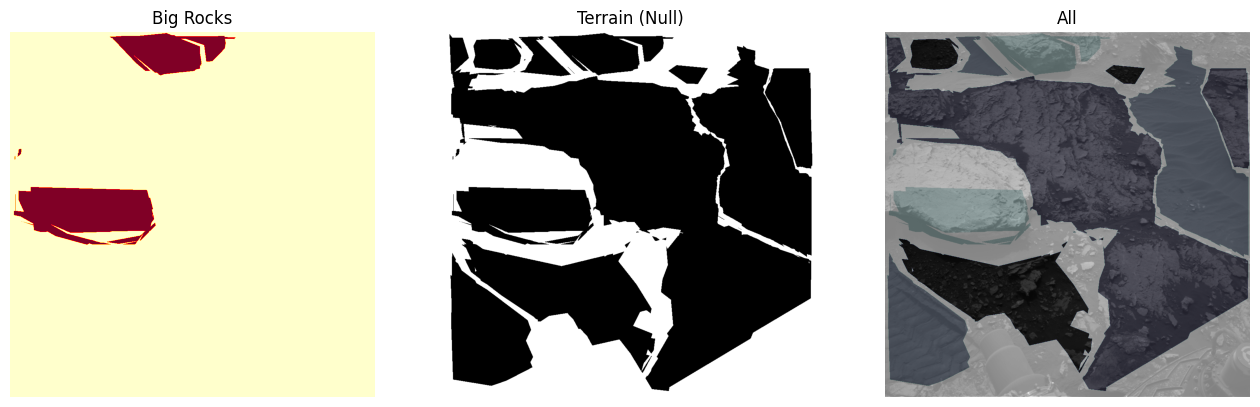

In [608]:
def show_labels_indv(label,image):

    label_0, label_1, label_2, label_3, label_4 = decompose_label(label)

    fig, ax = plt.subplots(1, 3, figsize=(16,9))
    ax[0].axis('off')
    ax[0].imshow(label_0, cmap='YlOrRd')
    ax[0].set_title('Soil')
    ax[1].axis('off')
    ax[1].imshow(label_1, cmap='YlOrRd')
    ax[1].set_title('Bedrock')
    ax[2].axis('off')
    ax[2].imshow(label_2, cmap='YlOrRd')
    ax[2].set_title('Sand')

    fig, ax = plt.subplots(1, 3, figsize=(16,9))
    ax[0].axis('off')
    ax[0].imshow(label_3, cmap='YlOrRd')
    ax[0].set_title('Big Rocks')
    ax[1].axis('off')
    ax[1].imshow(label_4,cmap='gray')
    ax[1].set_title('Terrain (Null)')

    ax[2].axis('off')
    ax[2].imshow(image,cmap='gray')
    ax[2].imshow(label, alpha =0.5, cmap='bone')
    #ax[2].imshow(label, alpha =0.25, cmap='gist_ncar')


    ax[2].set_title('All')

show_labels_indv(label,image)

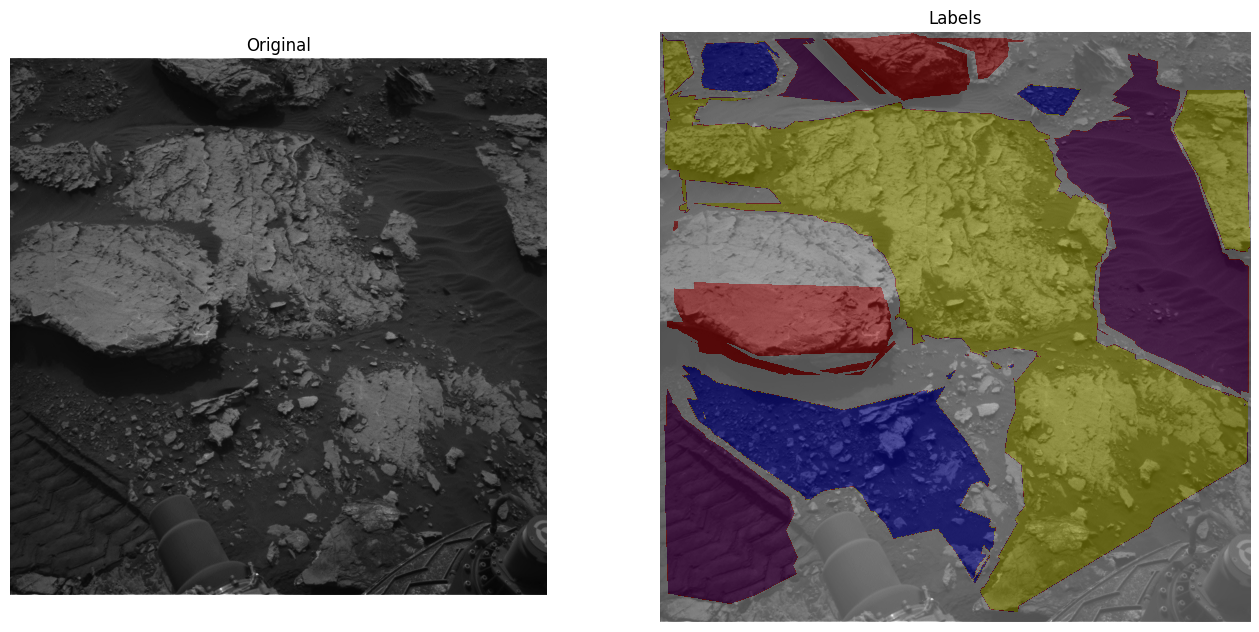

In [448]:
def show_labels_comp(image,label):
    fig, ax = plt.subplots(1, 2, figsize=(16, 9), gridspec_kw={'width_ratios': [2, 2.2]})

    ax[0].axis('off')
    ax[0].imshow(image, cmap='gray', aspect='equal')  # Set aspect='equal' for square
    ax[0].set_title('Original')

    ax[1].axis('off')
    ax[1].imshow(image, cmap='gray', aspect='equal')  # Set aspect='equal' for square
    img = ax[1].imshow(label, alpha=0.3, cmap=cmap_labels, aspect='equal')  # Set aspect='equal' for square
    ax[1].set_title('Labels')

#     divider = make_axes_locatable(ax[1])
#     cbar_ax = divider.append_axes("right", size="5%", pad=0.2)  # Adjust the size and pad

#     # Add colorbar to the right subplot
#     cbar = fig.colorbar(img, cax=cbar_ax, ticks=np.unique(label), orientation='vertical')

#     # Add tick labels to the colorbar
#     tick_labels = labels_key.values()
#     cbar.set_ticks(np.unique(label))
#     cbar.set_ticklabels(tick_labels)
#     cbar.ax.tick_params(axis='y', length=0)
#     cbar.ax.set_yticklabels(tick_labels, va='center')


    plt.show()
show_labels_comp(image,label)

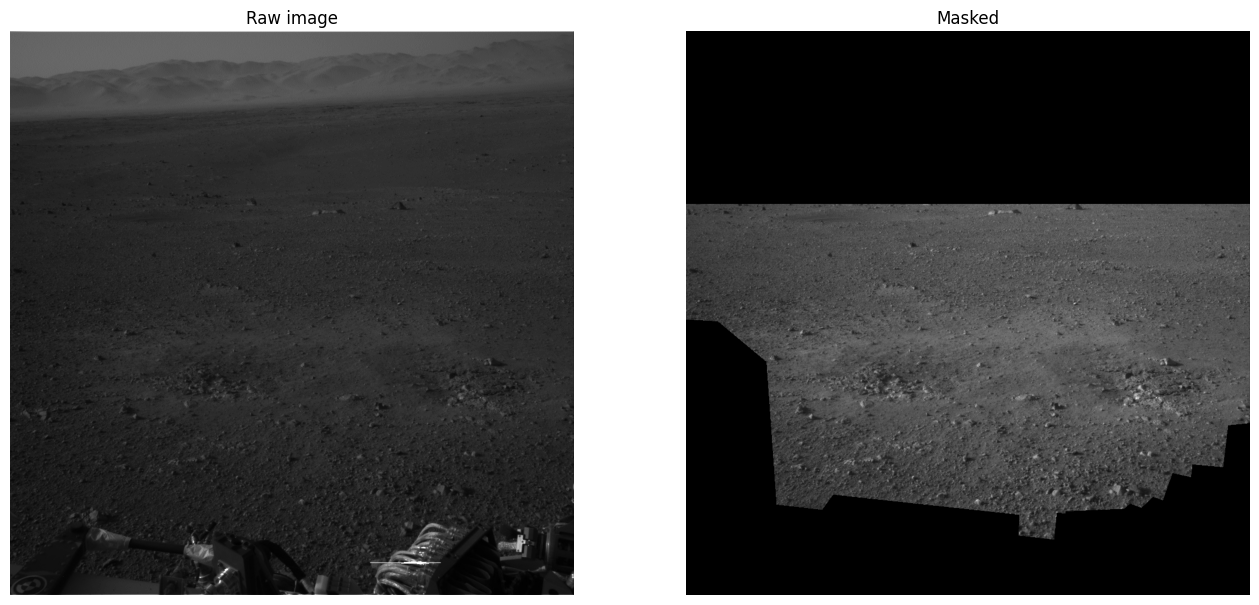

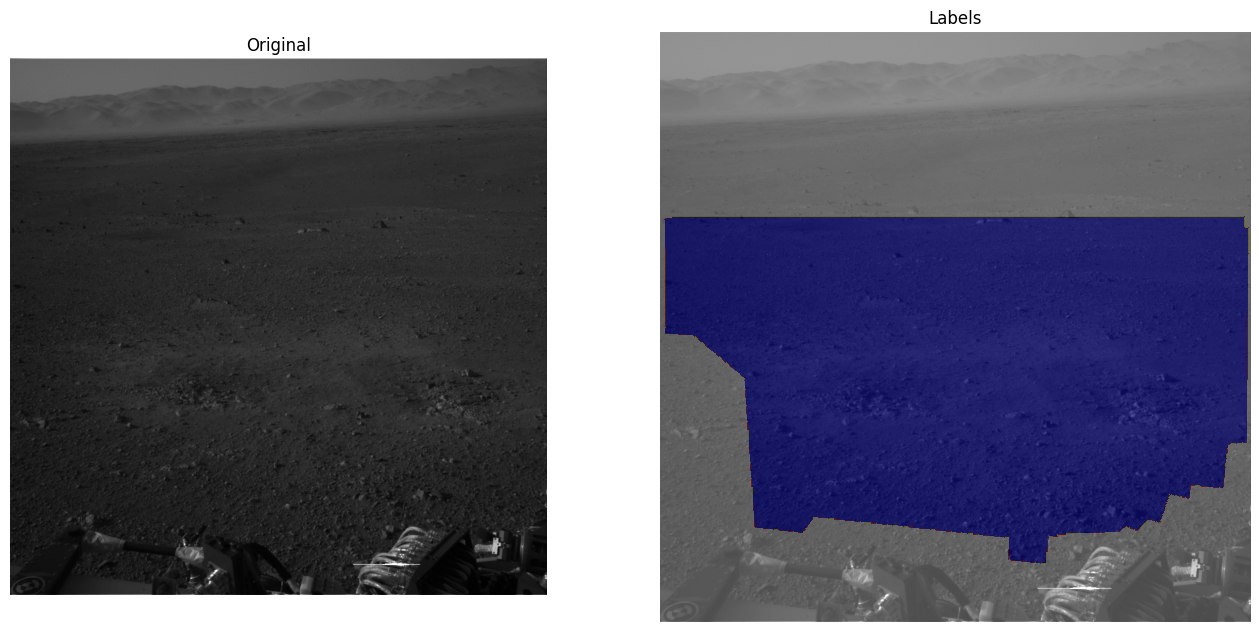

In [35]:
# Another example

image, label, mask = load_image_set(1, df_train)
show_image(image, mask)

show_labels_comp(image,label)

## Checking the images in the test set

In [36]:
TESTS_DIR

['masked-gold-min1-100agree',
 'masked-gold-min2-100agree',
 'masked-gold-min3-100agree']

In [37]:
dir_ = os.path.join(MASK_PATH_TESTS,TESTS_DIR[0])
print(dir_)
df_test = create_df(dir_)
print(len(df_test))
df_test.head()

../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min1-100agree
322


,name,label,rov_mask,rang_mask
0,NLA_409036068EDR_F0051606NCAM00348M1,NLA_409036068EDR_F0051606NCAM00348M1_merged,NLA_409036068MXY_F0051606NCAM00348M1,NLA_409036068RNG_F0051606NCAM00348M1
1,NLA_409036116EDR_F0051606NCAM00348M1,NLA_409036116EDR_F0051606NCAM00348M1_merged,NLA_409036116MXY_F0051606NCAM00348M1,NLA_409036116RNG_F0051606NCAM00348M1
2,NLA_409036860EDR_F0051662NCAM00346M1,NLA_409036860EDR_F0051662NCAM00346M1_merged,NLA_409036860MXY_F0051662NCAM00346M1,NLA_409036860RNG_F0051662NCAM00346M1
3,NLA_409036993EDR_F0051662NCAM05703M1,NLA_409036993EDR_F0051662NCAM05703M1_merged,NLA_409036993MXY_F0051662NCAM05703M1,NLA_409036993RNG_F0051662NCAM05703M1
4,NLA_409037112EDR_F0051662NCAM05703M1,NLA_409037112EDR_F0051662NCAM05703M1_merged,NLA_409037112MXY_F0051662NCAM05703M1,NLA_409037112RNG_F0051662NCAM05703M1


In [38]:
dir_ = os.path.join(MASK_PATH_TESTS,TESTS_DIR[1])
print(dir_)
df_test = create_df(dir_)
print(len(df_test))
df_test.head()

../raw_data/ai4mars-dataset-merged-0.1/msl/labels/test/masked-gold-min2-100agree
322


,name,label,rov_mask,rang_mask
0,NLA_409036068EDR_F0051606NCAM00348M1,NLA_409036068EDR_F0051606NCAM00348M1_merged,NLA_409036068MXY_F0051606NCAM00348M1,NLA_409036068RNG_F0051606NCAM00348M1
1,NLA_409036116EDR_F0051606NCAM00348M1,NLA_409036116EDR_F0051606NCAM00348M1_merged,NLA_409036116MXY_F0051606NCAM00348M1,NLA_409036116RNG_F0051606NCAM00348M1
2,NLA_409036860EDR_F0051662NCAM00346M1,NLA_409036860EDR_F0051662NCAM00346M1_merged,NLA_409036860MXY_F0051662NCAM00346M1,NLA_409036860RNG_F0051662NCAM00346M1
3,NLA_409036993EDR_F0051662NCAM05703M1,NLA_409036993EDR_F0051662NCAM05703M1_merged,NLA_409036993MXY_F0051662NCAM05703M1,NLA_409036993RNG_F0051662NCAM05703M1
4,NLA_409037112EDR_F0051662NCAM05703M1,NLA_409037112EDR_F0051662NCAM05703M1_merged,NLA_409037112MXY_F0051662NCAM05703M1,NLA_409037112RNG_F0051662NCAM05703M1


# Data augmentation

In [39]:
# import albumentations as A

# Use scripts

In [40]:
small_dataset = 100

df = create_df(MASK_PATH_TRAIN)

df = df.iloc[:100]

X, y = load_images(df)

No range mask found for NLB_432655207EDR_F0160148NCAM00394M1
✅ loaded raw images and labels
✅ decomposed labels into binary masks


In [41]:
X.shape, y.shape

((100, 1024, 1024), (5, 100, 1024, 1024))